# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости результатов.")

Для воспроизводимости результатов.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [143]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [144]:

np.random.seed(42)
rand_str = np.random.randint(1, df_train.shape[0], 10)

In [145]:
df_train.loc[rand_str]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
861,Mahindra Bolero 2011-2019 EX NON AC,2014,480000,37000,Diesel,Individual,Manual,First Owner,15.96 kmpl,2523 CC,62.1 bhp,195Nm@ 1400-2200rpm,7.0
5391,Toyota Fortuner 4x2 AT,2015,1650000,91000,Diesel,Dealer,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
5227,Maruti Alto 800 LXI,2015,245000,40000,Petrol,Individual,Manual,First Owner,22.74 kmpl,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0
5192,Maruti Swift Dzire ZDI,2014,459999,65000,Diesel,Individual,Manual,Second Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
3773,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3093,Mahindra KUV 100 G80 K4 Plus,2018,450000,20000,Petrol,Individual,Manual,First Owner,18.15 kmpl,1198 CC,82 bhp,115Nm@ 3500-3600rpm,6.0
5735,Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII,2011,350000,500000,Diesel,Individual,Manual,Second Owner,12.99 kmpl,2494 CC,100.57 bhp,200Nm@ 1400-3400rpm,7.0
6266,Mahindra XUV500 W5 BSIV,2018,1051000,59865,Diesel,Dealer,Manual,First Owner,15.1 kmpl,2179 CC,152.87 bhp,360Nm@ 1750-2800rpm,7.0
467,Volkswagen Vento Diesel Highline,2012,450000,90000,Diesel,Individual,Manual,First Owner,20.54 kmpl,1598 CC,103.6 bhp,250Nm@ 1500-2500rpm,5.0
5335,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [146]:
df_train.loc[[i for i in range(0,5)]+[i for i in range(df_train.shape[0]-5,df_train.shape[0])]]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [147]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [148]:
df_train.describe(include = ['int64', 'float64'])

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [149]:
df_train.describe(include = ['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [150]:
df_test.describe(include = ['int64', 'float64'])

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [151]:
df_test.describe(include = ['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [152]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [153]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [154]:
df_train.drop(columns = "selling_price").duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [155]:
df_train.loc[df_train.drop(columns = "selling_price").duplicated() == True].index

Index([ 254,  258,  268,  324,  325,  326,  338,  357,  358,  359,
       ...
       6878, 6880, 6881, 6891, 6906, 6947, 6984, 6989, 6997, 6998],
      dtype='int64', length=1159)

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [156]:
df_train_dedup = df_train.drop(df_train.loc[df_train.drop(columns = "selling_price").duplicated() == True].index)

In [157]:
assert df_train_dedup.shape == (5840, 13)

In [158]:
df_train = df_train.drop(df_train.loc[df_train.drop(columns = "selling_price").duplicated() == True].index)

In [159]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [160]:
df_train = df_train.reset_index()

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

## Train

In [161]:
df_train.head(n=15)

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
5,5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
6,6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
7,7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
8,8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0
9,9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm,5.0


In [162]:
df_train.mileage = [float(i.split()[0]) if type(i) == str else np.nan for i in df_train.mileage.values]

In [163]:
df_train.mileage.dtypes

dtype('float64')

In [164]:
df_train.engine = [float(i.split()[0]) if type(i) == str else np.nan for i in df_train.engine.values]

In [165]:
df_train.engine.dtypes

dtype('float64')

In [166]:
import re

In [167]:
df_train.dtypes

index              int64
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power         object
torque            object
seats            float64
dtype: object

In [168]:
max_torque_array = []
torque_array = []
for ind,i in enumerate(df_train.torque.values):
    if type(i) == str:
        str_init = i
        str_init = str_init.replace(",", ".")
        str_init = str_init.replace("-", " ")
#         print(i)
        arr_numeric = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?",str_init)
        max_torque = float(max(arr_numeric))
        torque = float(arr_numeric[0])
#         print(torque, max_torque)
        max_torque_array.append(max_torque)
        torque_array.append(torque)
#         if ind == 20:
#             break
        
    else:
        max_torque_array.append(np.nan)
        torque_array.append(np.nan)
        

In [169]:
max_power_array = []

for ind,i in enumerate(df_train.torque.values):
    if type(i) == str:
        str_init = i
#         print(i)
        arr_numeric = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?",str_init)
        max_power = float(arr_numeric[0])
#         print(torque, max_torque)
        max_power_array.append(max_power)
#         if ind == 20:
#             break
        
    else:
        max_power_array.append(np.nan)

In [171]:
len(max_torque_array), len(torque_array), len(max_power_array)

(5840, 5840, 5840)

In [172]:
df_train.max_power = max_power_array

In [173]:
df_train.max_power.dtypes

dtype('float64')

In [174]:
df_train["max_torque"] = max_torque_array

In [175]:
df_train.max_torque.dtypes

dtype('float64')

In [176]:
df_train["torque"] = torque_array

In [177]:
df_train.torque.dtypes

dtype('float64')

## Test

In [184]:
df_test.mileage = [float(i.split()[0]) if type(i) == str else np.nan for i in df_test.mileage.values]
df_test.engine = [float(i.split()[0]) if type(i) == str else np.nan for i in df_test.engine.values]

max_torque_array = []
torque_array = []
for ind,i in enumerate(df_test.torque.values):
    if type(i) == str:
        str_init = i
        str_init = str_init.replace(",", ".")
        str_init = str_init.replace("-", " ")
#         print(i)
        arr_numeric = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?",str_init)
        max_torque = float(max(arr_numeric))
        torque = float(arr_numeric[0])
#         print(torque, max_torque)
        max_torque_array.append(max_torque)
        torque_array.append(torque)
#         if ind == 20:
#             break
        
    else:
        max_torque_array.append(np.nan)
        torque_array.append(np.nan)
        
max_power_array = []

for ind,i in enumerate(df_test.torque.values):
    if type(i) == str:
        str_init = i
#         print(i)
        arr_numeric = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?",str_init)
        max_power = float(arr_numeric[0])
#         print(torque, max_torque)
        max_power_array.append(max_power)
#         if ind == 20:
#             break
        
    else:
        max_power_array.append(np.nan)
        
df_test["max_torque"] = max_torque_array
df_test["torque"] = torque_array
df_test.max_power = max_power_array

In [185]:
df_test.torque.dtypes, df_test.max_torque.dtypes, df_test.max_power.dtypes, df_test.mileage.dtypes, df_test.engine.dtypes

(dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'))

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



## Train + Test

In [178]:
df_train.isna().sum()

index              0
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        187
torque           187
seats            186
max_torque       187
dtype: int64

In [179]:
df_train[["mileage",
"engine", 
"max_power",
"torque",
"seats"
,"max_torque"]].median()

mileage         19.37
engine        1248.00
max_power      150.00
torque         150.00
seats            5.00
max_torque    2000.00
dtype: float64

In [180]:
df_train[["mileage",
"engine", 
"max_power",
"torque",
"seats"
,"max_torque"]] = df_train[["mileage",
"engine", 
"max_power",
"torque",
"seats"
,"max_torque"]].fillna(df_train[["mileage",
"engine", 
"max_power",
"torque",
"seats"
,"max_torque"]].median())

In [181]:
df_train.isna().sum()

index            0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
max_torque       0
dtype: int64

In [186]:
df_test[["mileage",
"engine", 
"max_power",
"torque",
"seats"
,"max_torque"]] = df_test[["mileage",
"engine", 
"max_power",
"torque",
"seats"
,"max_torque"]].fillna(df_train[["mileage",
"engine", 
"max_power",
"torque",
"seats"
,"max_torque"]].median())

In [187]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
max_torque       0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [194]:
df_train = df_train.astype({'engine': 'int64',
                            'seats' : 'int64'})

In [195]:
df_train.dtypes

index              int64
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
torque           float64
seats              int64
max_torque       float64
dtype: object

In [193]:
df_test = df_test.astype({'engine': 'int64',
                            'seats' : 'int64'})

In [196]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
torque           float64
seats              int64
max_torque       float64
dtype: object

In [125]:
print("Потому что машины бывают 5-ти местные, 7-ми местные, 9-местные, 3-местные и т.д., как с кол-вом дверей, скачок не идёт с шагом 1, это ТИП машины")

Потому что машины бывают 5-ти местные, 7-ми местные, 9-местные, 3-местные и т.д., как с кол-вом дверей, скачок не идёт с шагом 1, это ТИП машины


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [197]:
import seaborn as sns

/Users/ab/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


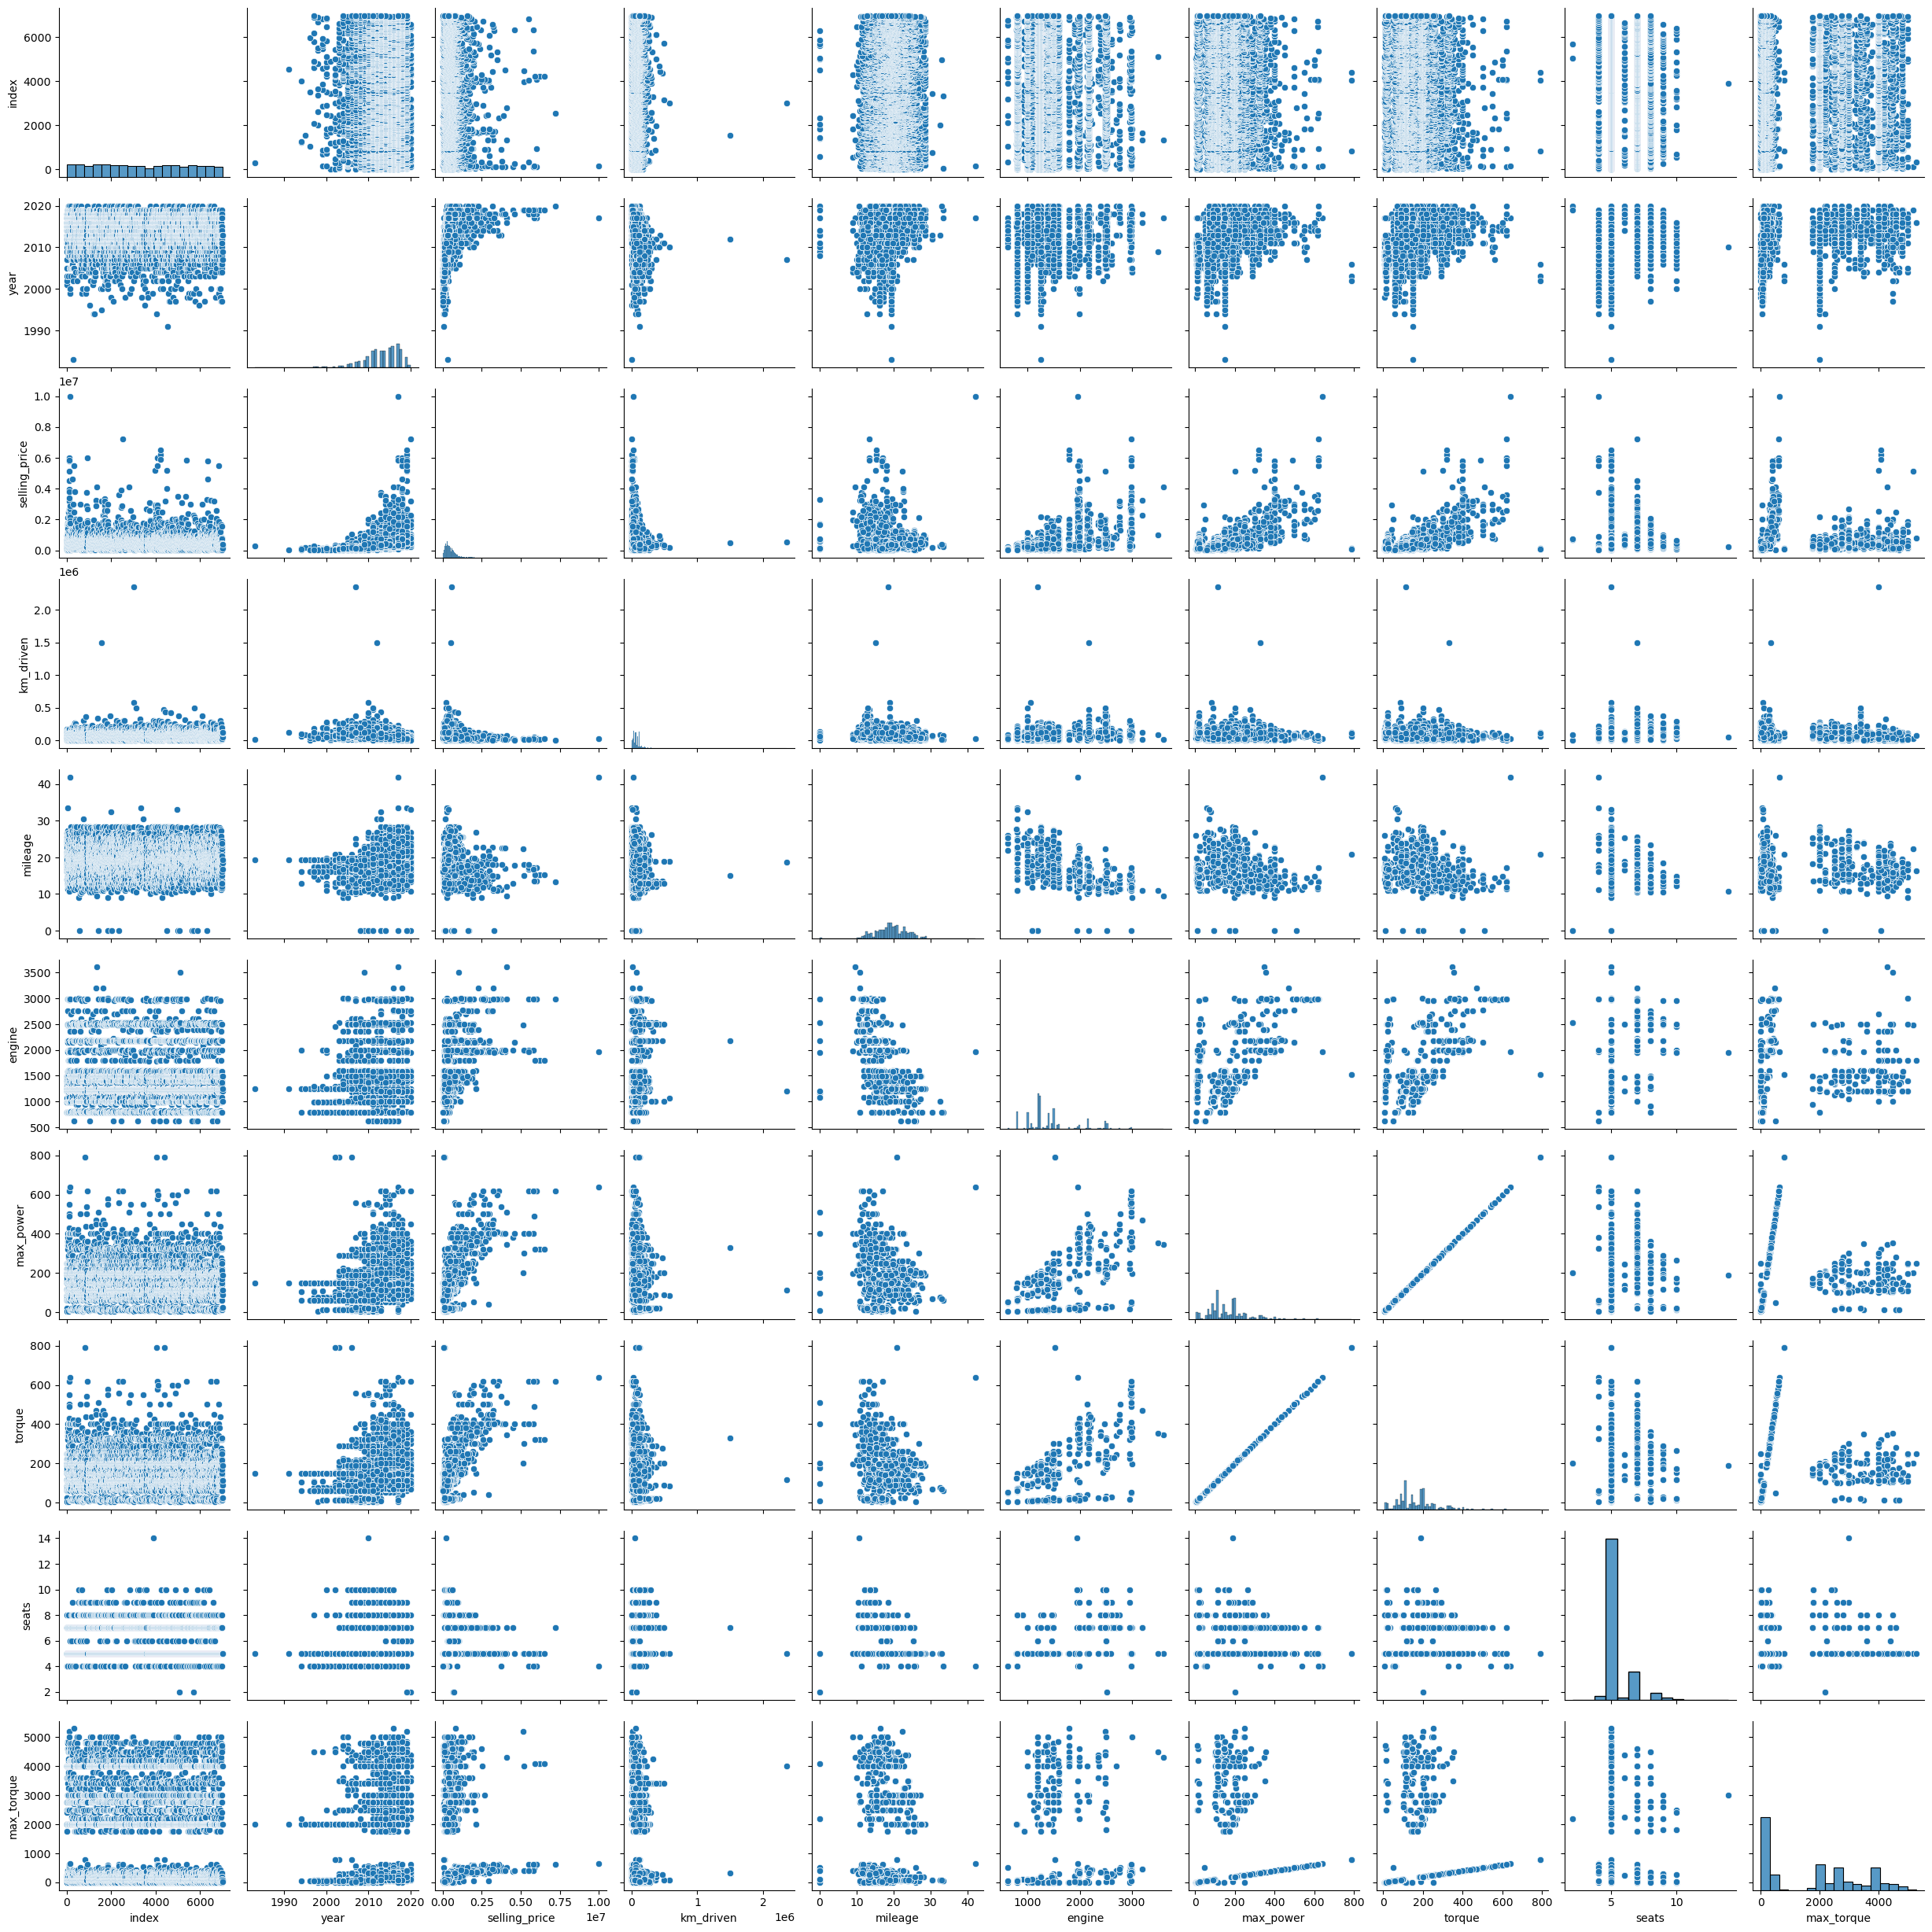

In [198]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

**ЦЕНА** зависит от **года выпуска машины** предположительно нелинейно (в виде полинома 2-го порядка), кол-во мест машины в целом вряд ли значимо влияет на стоимость, но **среди машин с меньшим количеством мест больше дорогих**, мксимальная мощность и крутящий момент предположительно **влияют на ст-ть машины** линейно, пробег влияет на стоимость машины неочевидным образом, **расход топлива** (тот, что mileage, где mileage переводится как пробег, что сбивает с толку) не показывает также "явной зависимости", а вот **пробег** явно имеет нелинейную отрицательную убываюшую зависимость с ценой (чем он выше, тем ниже цена, притом за каждые X следующих ед. пробега она падает меньше).

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

/Users/ab/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


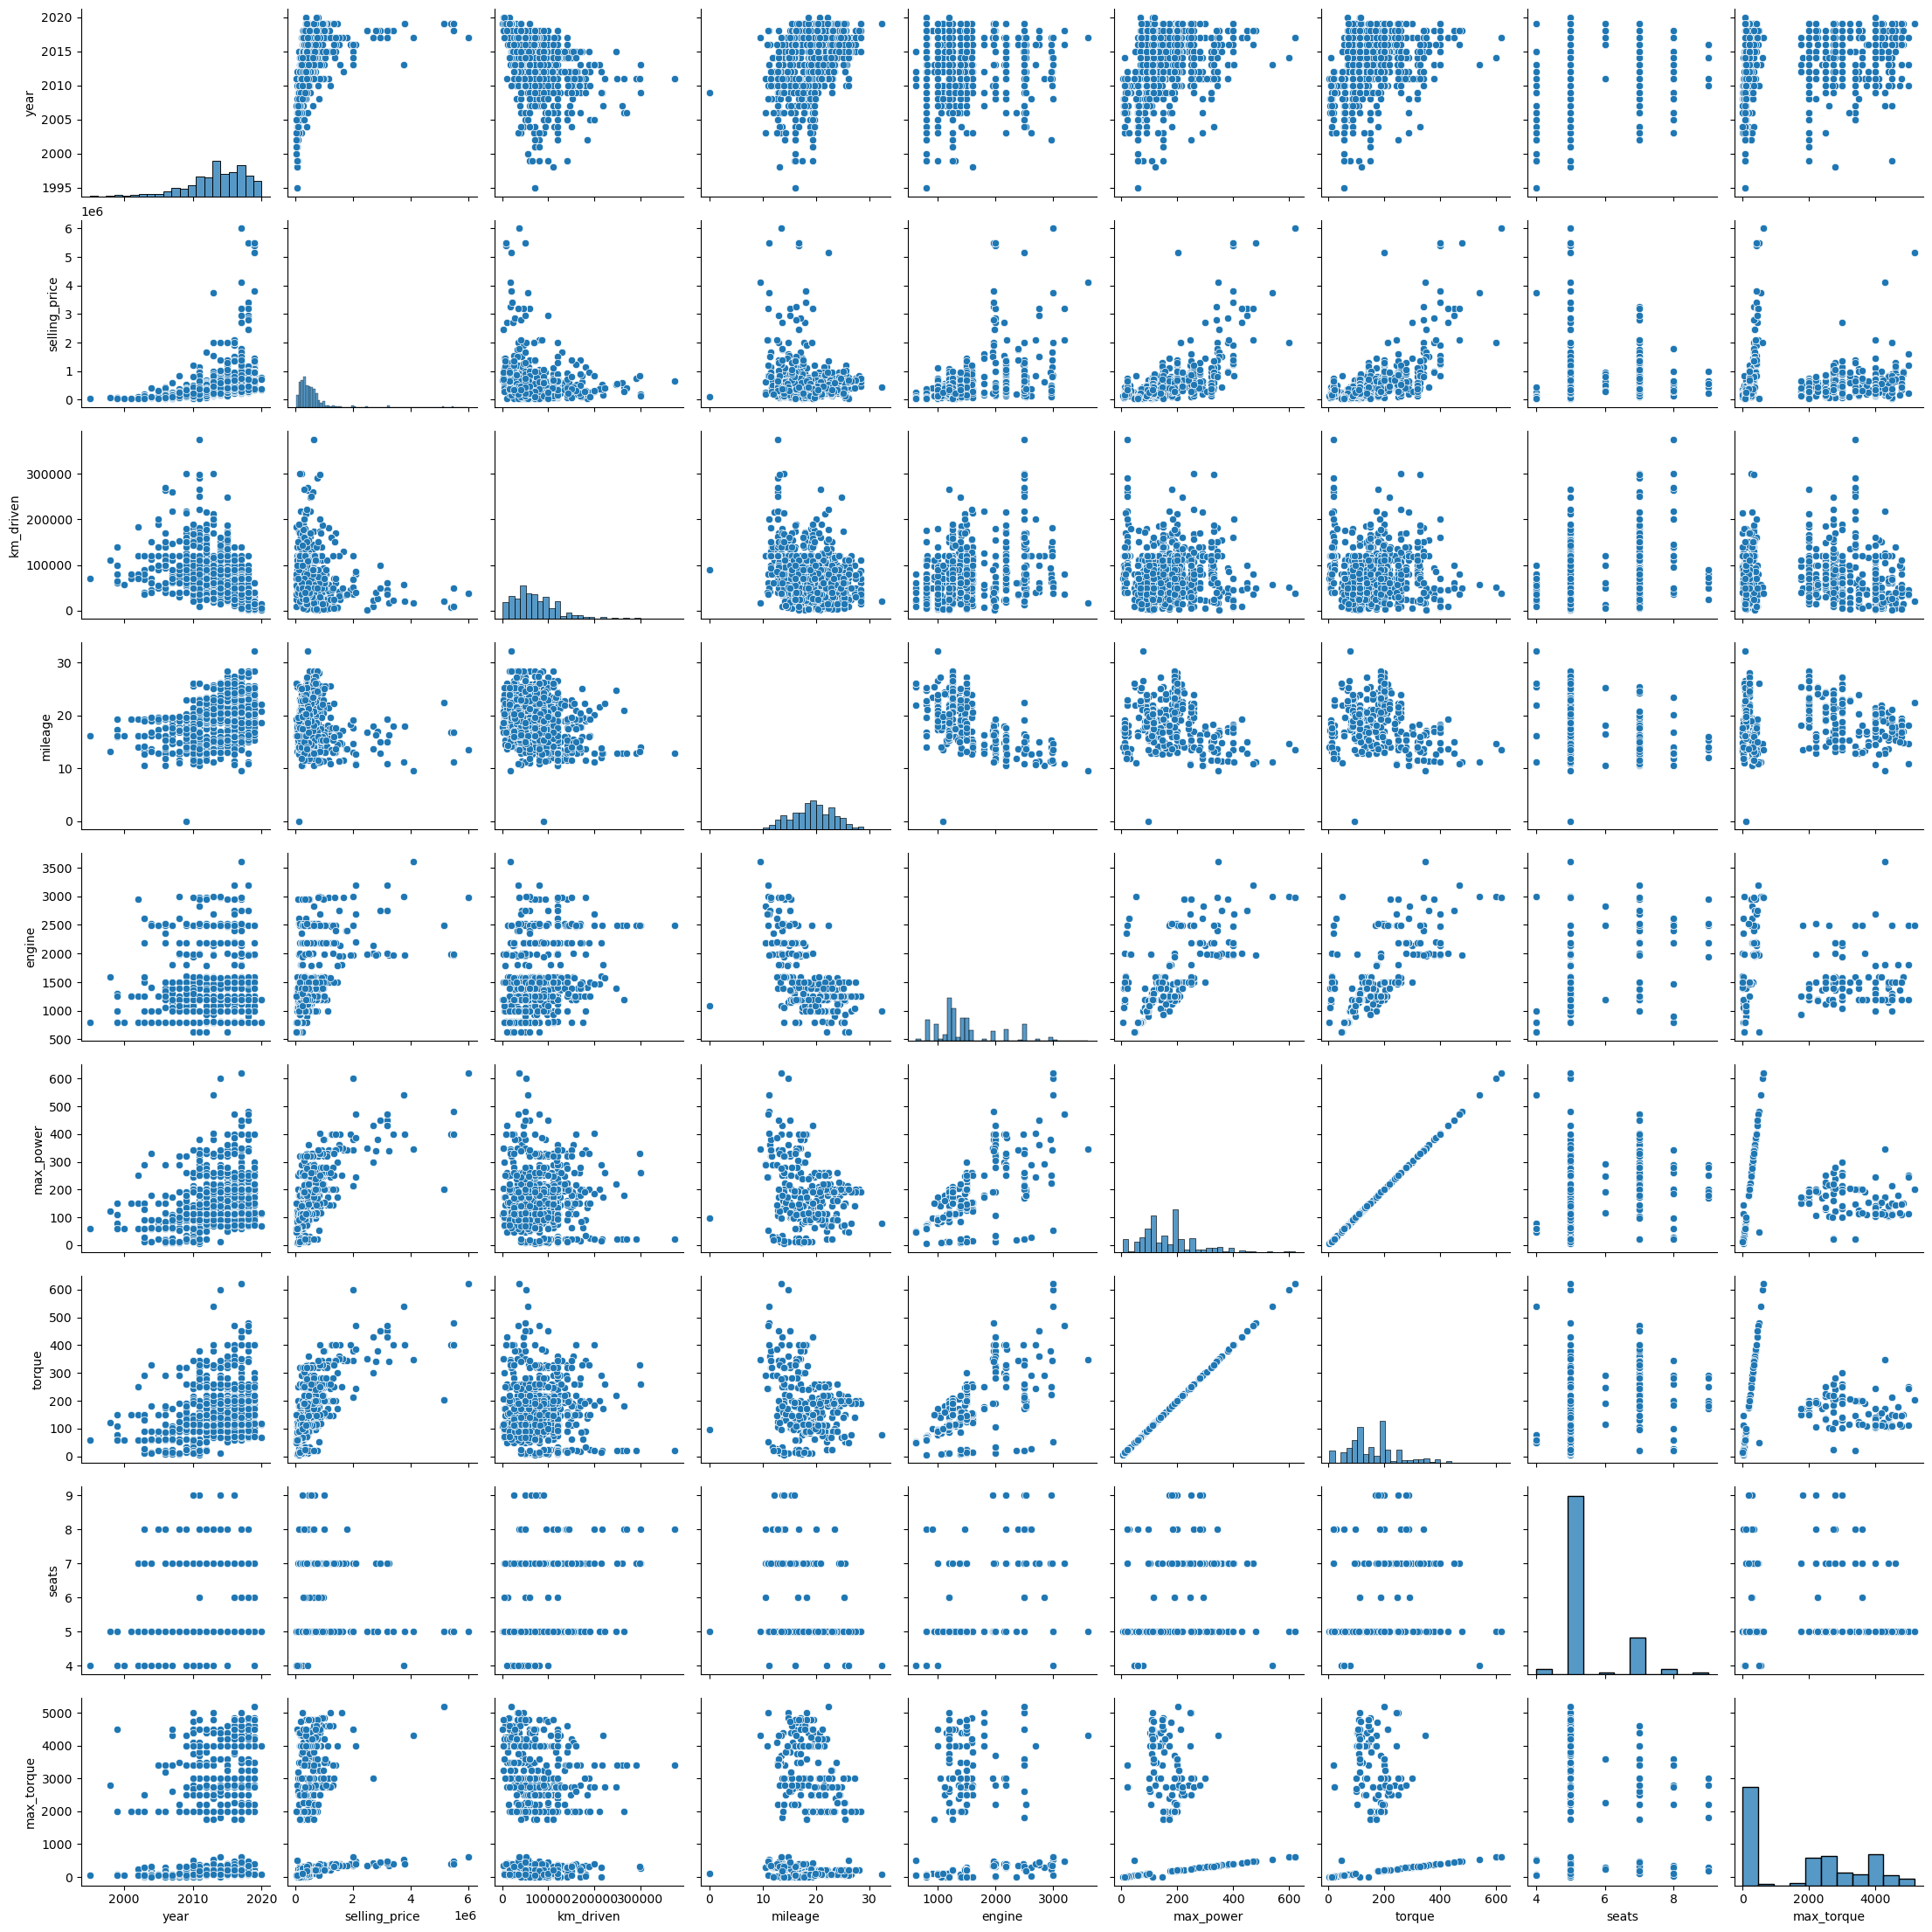

In [199]:
sns.pairplot(df_test)

**ОТВЕТ:** в целом, наблюдаемые тенденции сохранились

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

**СМ. НИЖЕ**

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

<Axes: >

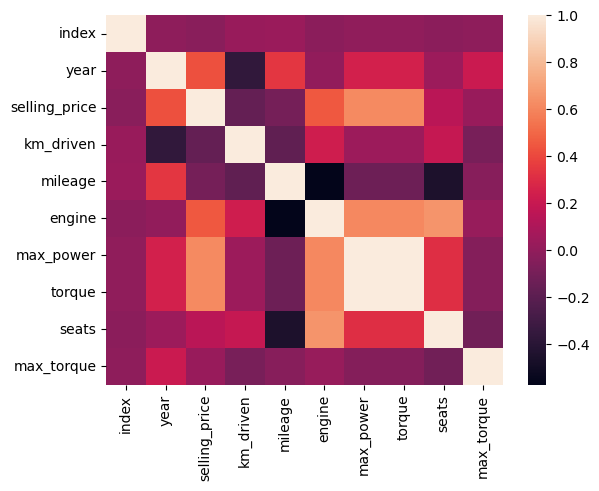

In [203]:
sns.heatmap(df_train.select_dtypes(include = ['int64', 'float64']).corr())

**Кол-во место, максмальная мошность и крутящий момент** имеет высокую корреляцию **между собой** - могут однозначно определить тип машины, также наибольшую корелляцию *(по модулю)* **с ценой** имеют **год выпусска, максмальная мошность и крутящий момент, пробег**

**Уберем index**

In [207]:
df_train = df_train.drop(columns = "index")

In [211]:
df_train.select_dtypes(include = ['int64', 'float64']).corr().abs().min()

year             0.002819
selling_price    0.028953
km_driven        0.039362
mileage          0.034577
engine           0.002819
max_power        0.039362
torque           0.039362
seats            0.041178
max_torque       0.020012
dtype: float64

In [209]:
df_train.select_dtypes(include = ['int64', 'float64']).corr()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.250071,0.250071,0.041178,0.212906
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.613397,0.613397,0.149953,0.028953
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.039362,0.039362,0.192328,-0.088986
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.132415,-0.132415,-0.451059,-0.034577
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.612568,0.612568,0.652172,0.020012
max_power,0.250071,0.613397,0.039362,-0.132415,0.612568,1.000000,1.000000,0.310590,-0.046206
torque,0.250071,0.613397,0.039362,-0.132415,0.612568,1.000000,1.000000,0.310590,-0.046206
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.310590,0.310590,1.000000,-0.112906
max_torque,0.212906,0.028953,-0.088986,-0.034577,0.020012,-0.046206,-0.046206,-0.112906,1.000000


Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
**Год** и **объеём двигателя**, видимо уже на 1970-е:)
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
**Кол-во место, максмальная мошность и крутящий момент** имеет высокую корреляцию **между собой** - могут однозначно определить тип машины, также наибольшую корелляцию *(по модулю)* **с ценой** имеют **год выпусска, максмальная мошность и крутящий момент, пробег**
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>
В целом, да, "правило буравчика" считать коррелляцию "значимой", если она по модулю превышает 0.3, от 0.3 до 0.7 она считается "слабой".

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

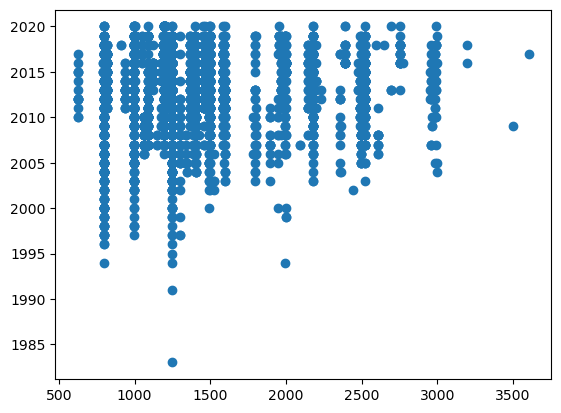

In [215]:
plt.scatter(df_train['engine'] ,df_train['year'])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
**Кол-во место, максмальная мошность и крутящий момент**

In [223]:
pivot_data = df_train.pivot_table(values = ['max_power', 'torque', 'seats'], index = 'selling_price', aggfunc = 'median')

**У нас есть всего +-630 цен, посмотрим з-ть УРОВНЯ ЦЕНЫ от МЕДИАНЫ ПРИЗНАКА ДЛЯ ДАННОГО УРОВНЯ**

**ЗАЧЕМ?** Получим совершенно иную картину, нежели для обычного pairplot, обнаружим зависимости, иначе скрытые за шумом

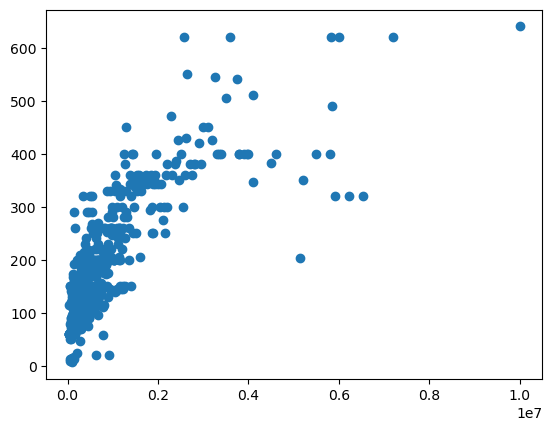

In [224]:
plt.scatter(pivot_data.index, pivot_data['max_power'])

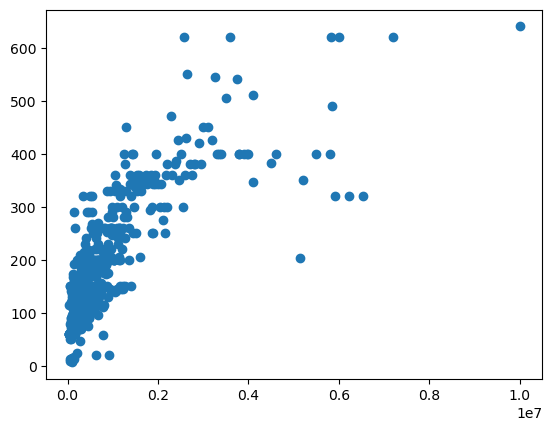

In [225]:
plt.scatter(pivot_data.index, pivot_data['torque'])

**ЗДЕСЬ ПОДТВЕРДИМ НАШ ВЫВОД ОТ НЕЗ-ти** цены от кол-ва мест, слишком много разных машин разных классов и сегментов могут иметь одинаковое кол-во мест

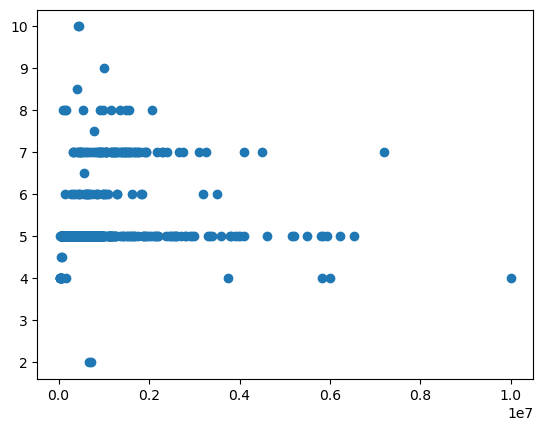

In [226]:
plt.scatter(pivot_data.index, pivot_data['seats'])

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [235]:
df_train_prepared = df_train.copy().select_dtypes(include = ['int64', 'float64'])

In [236]:
df_test_prepared = df_test.copy().select_dtypes(include = ['int64', 'float64'])

In [239]:
y_train = df_train_prepared["selling_price"]
X_train = df_train_prepared.drop(columns = "selling_price")

In [240]:
X_train

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque
0,2014,145500,23.40,1248,190.00,190.00,5,2000.0
1,2014,120000,21.14,1498,250.00,250.00,5,2500.0
2,2010,127000,23.00,1396,22.40,22.40,5,2750.0
3,2007,120000,16.10,1298,11.50,11.50,5,4.5
4,2017,45000,20.14,1197,113.75,113.75,5,4000.0
...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,96.10,96.10,5,96.1
5836,2013,50000,18.90,998,90.00,90.00,5,90.0
5837,2013,110000,18.50,1197,113.70,113.70,5,4000.0
5838,2007,119000,16.80,1493,24.00,24.00,5,24.0


In [245]:
#У меня больше столбцов т.к. есть бонус. Их 8 (torque не удален + 2 колонки)

assert X_train.shape == (5840, 8)

In [243]:
y_test = df_test_prepared["selling_price"]
X_test = df_test_prepared.drop(columns = "selling_price")

In [244]:
#У меня больше столбцов т.к. есть бонус. Их 8

assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


In [247]:
lin_reg_def = LinearRegression()
lin_reg_def.fit(X_train, y_train)

LinearRegression()

In [254]:
y_hat_test_def = lin_reg_def.predict(X_test)

In [253]:
y_hat_train_def = lin_reg_def.predict(X_train)

In [259]:
print(f" R^2 на Train: {lin_reg_def.score(X_train, y_train)}")
print(f" RMSE на Train: {MSE(y_train,y_hat_train_def, squared = False)}")

 R^2 на Train: 0.525579692612988
 RMSE на Train: 368764.2181566033


In [260]:
print(f" R^2 на Test: {lin_reg_def.score(X_test, y_test)}")
print(f" RMSE на Train: {MSE(y_test,y_hat_test_def, squared = False)}")

 R^2 на Test: 0.5215177152353571
 RMSE на Train: 524447.5957136637


# Результаты так себе, но некоторая объясняющая ценности у модели есть

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [263]:
from sklearn.preprocessing import StandardScaler



In [265]:
scaler = StandardScaler()
lin_reg_def_1 = LinearRegression()

In [267]:
X_train_norm = scaler.fit_transform(X_train)

In [268]:
X_test_norm  = scaler.fit_transform(X_test)

In [269]:
lin_reg_def_1.fit(X_train_norm, y_train)

LinearRegression()

In [270]:
y_hat_test_def = lin_reg_def.predict(X_test_norm)
y_hat_train_def = lin_reg_def.predict(X_train_norm)

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [273]:
print(f" R^2 на Train: {lin_reg_def.score(X_train, y_train)}")
print(f" RMSE на Train: {MSE(y_train,y_hat_train_def, squared = False)}")

 R^2 на Train: 0.525579692612988
 RMSE на Train: 94137318.82175359


In [272]:
print(f" R^2 на Test: {lin_reg_def.score(X_test, y_test)}")
print(f" RMSE на Train: {MSE(y_test,y_hat_test_def, squared = False)}")

 R^2 на Test: 0.5215177152353571
 RMSE на Train: 94233710.99285428


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [278]:
print(*[f"Признак: {i}, коэф-т : {k}\n" for i,k in zip(X_train.columns,lin_reg_def_1.coef_)])

Признак: year, коэф-т : 191995.49940914832
 Признак: km_driven, коэф-т : -56123.18054288571
 Признак: mileage, коэф-т : -64333.50488273818
 Признак: engine, коэф-т : 172798.8503243334
 Признак: max_power, коэф-т : 102906.13604690005
 Признак: torque, коэф-т : 102906.13604689998
 Признак: seats, коэф-т : -127082.04332713551
 Признак: max_torque, коэф-т : -40891.25691883258



In [279]:
print(*[f"Признак: {i}, коэф-т : {k}\n" for i,k in zip(X_train.columns,lin_reg_def.coef_)])

Признак: year, коэф-т : 46882.242082690216
 Признак: km_driven, коэф-т : -0.9343586536432569
 Признак: mileage, коэф-т : -16141.356447582708
 Признак: engine, коэф-т : 355.8304953874546
 Признак: max_power, коэф-т : 1128.7716296364783
 Признак: torque, коэф-т : 1128.7716296377264
 Признак: seats, коэф-т : -129377.2156070958
 Признак: max_torque, коэф-т : -25.31329828066899



In [260]:
print(f" R^2 на Test: {lin_reg_def.score(X_test, y_test)}")
print(f" RMSE на Train: {MSE(y_test,y_hat_test_def, squared = False)}")

 R^2 на Test: 0.5215177152353571
 RMSE на Train: 524447.5957136637


Как видно, самым важным является **год выпуска автомобиля**

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [287]:
from sklearn.linear_model import Lasso

Lasso_reg_def = Lasso()

In [288]:
Lasso_reg_def.fit(X_train_norm, y_train)

Lasso()

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [289]:
print(*[f"Признак: {i}, коэф-т : {k}\n" for i,k in zip(X_train.columns,Lasso_reg_def.coef_)])

Признак: year, коэф-т : 191993.32081993806
 Признак: km_driven, коэф-т : -56122.53718383729
 Признак: mileage, коэф-т : -64331.34280284898
 Признак: engine, коэф-т : 172796.20253137476
 Признак: max_power, коэф-т : 205812.6129576043
 Признак: torque, коэф-т : 0.0
 Признак: seats, коэф-т : -127078.24447963228
 Признак: max_torque, коэф-т : -40889.16342580878



In [399]:
y_hat_test_def = Lasso_reg_def.predict(X_test_norm)
y_hat_train_def = Lasso_reg_def.predict(X_train_norm)

In [404]:
from sklearn.metrics import r2_score as R2

In [406]:
print(f" R^2 на Train: {R2(y_train,y_hat_train_def)}")
print(f" RMSE на Train: {MSE(y_train,y_hat_train_def, squared = False)}")

 R^2 на Train: 0.5255796925669476
 RMSE на Train: 368764.2181744968


In [407]:
print(f" R^2 на Test: {R2(y_test, y_hat_test_def)}")
print(f" RMSE на Train: {MSE(y_test,y_hat_test_def, squared = False)}")

 R^2 на Test: 0.5079453833977225
 RMSE на Train: 531833.662489237


In [ ]:
# y_hat_test_def = Lasso_reg_def.predict(X_test_norm)
# y_hat_train_def = Lasso_reg_def.predict(X_train_norm)

# print(f" R^2 на Train: {R2(y_train,y_hat_train_def)}")
# print(f" RMSE на Train: {MSE(y_train,y_hat_train_def, squared = False)}")
# print(f" R^2 на Test: {R2(y_test, y_hat_test_def)}")
# print(f" RMSE на Train: {MSE(y_test,y_hat_test_def, squared = False)}")

**Да, признак torque -- крутящией момент**, из-за высокой кросс-корреляции с другими признаками.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Поменяем альфу от 0 до 2 с шагом 0.25, попробуем регуляризацию L1, L2 и промежуточные. Попробуем поменять learning_rate (критерий остановки)

In [320]:
step_alpha = 0.25
step_tol_lin = 1 #для референса

param_grid = {"alpha" : np.arange(0,2+step_alpha,step_alpha),
             "tol" : [10**(-i) for i in range(3,7,1)]}

In [321]:
from sklearn.model_selection import GridSearchCV

grid_lasso_10 = GridSearchCV(estimator = Lasso(), cv = 10, scoring = "neg_root_mean_squared_error",
                             param_grid = param_grid)

In [322]:
grid_lasso_10.fit(X_train_norm, y_train)

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.849e+14, tolerance: 1.247e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.678e+14, tolerance: 1.521e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.751e+14, tolerance: 1.599e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.678e+14, tolerance: 1.521e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ]),
                         'tol': [0.001, 0.0001, 1e-05, 1e-06]},
             scoring='neg_root_mean_squared_error')

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

$10*3*10=300$

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [323]:
pd.DataFrame(grid_lasso_10.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
32,0.002206,0.000330,0.000597,0.000111,2.0,0.001,"{'alpha': 2.0, 'tol': 0.001}",-629296.574675,-291338.351629,-317162.693920,-324189.711627,-293786.889149,-365032.213088,-470478.474345,-289598.720040,-257989.849964,-361102.529613,-359997.600805,105986.365911,1
33,0.002044,0.000099,0.000511,0.000049,2.0,0.0001,"{'alpha': 2.0, 'tol': 0.0001}",-629296.542288,-291338.354814,-317162.678590,-324189.732762,-293786.948602,-365032.199791,-470478.465386,-289598.736507,-257989.869140,-361102.531415,-359997.605929,105986.349732,2
34,0.002106,0.000216,0.000559,0.000133,2.0,0.00001,"{'alpha': 2.0, 'tol': 1e-05}",-629296.532987,-291338.355713,-317162.676666,-324189.736288,-293786.970999,-365032.195014,-470478.463975,-289598.736787,-257989.873746,-361102.536075,-359997.607825,105986.345243,3
35,0.003460,0.002671,0.000662,0.000170,2.0,0.000001,"{'alpha': 2.0, 'tol': 1e-06}",-629296.527889,-291338.355887,-317162.676296,-324189.737554,-293786.982080,-365032.193948,-470478.464543,-289598.735713,-257989.873541,-361102.537714,-359997.608517,105986.343363,4
28,0.003118,0.001078,0.000811,0.000228,1.75,0.001,"{'alpha': 1.75, 'tol': 0.001}",-629296.311319,-291338.385790,-317162.631071,-324189.793617,-293787.286974,-365032.130132,-470478.489348,-289598.806796,-257990.093533,-361102.507671,-359997.643625,105986.243641,5
29,0.002351,0.000385,0.000570,0.000117,1.75,0.0001,"{'alpha': 1.75, 'tol': 0.0001}",-629296.278933,-291338.387487,-317162.615741,-324189.814752,-293787.346427,-365032.120284,-470478.479246,-289598.823263,-257990.115723,-361102.511256,-359997.649311,105986.227168,6
30,0.002437,0.000376,0.000702,0.000266,1.75,0.00001,"{'alpha': 1.75, 'tol': 1e-05}",-629296.267147,-291338.388387,-317162.613817,-324189.818981,-293787.368824,-365032.117752,-470478.478979,-289598.823543,-257990.117315,-361102.514133,-359997.650888,105986.222442,7
31,0.002674,0.000263,0.000692,0.000112,1.75,0.000001,"{'alpha': 1.75, 'tol': 1e-06}",-629296.264533,-291338.388560,-317162.613437,-324189.819543,-293787.379905,-365032.116686,-470478.479547,-289598.822469,-257990.117110,-361102.516244,-359997.651803,105986.221219,8
24,0.002916,0.000960,0.000730,0.000167,1.5,0.001,"{'alpha': 1.5, 'tol': 0.001}",-629296.034210,-291338.418465,-317162.560004,-324189.886354,-293787.706681,-365032.052872,-470478.504353,-289598.893554,-257990.337105,-361102.485731,-359997.687933,105986.116603,9
25,0.002059,0.000134,0.000510,0.000055,1.5,0.0001,"{'alpha': 1.5, 'tol': 0.0001}",-629296.010040,-291338.420605,-317162.552896,-324189.898994,-293787.744254,-365032.043025,-470478.494251,-289598.910021,-257990.359295,-361102.489316,-359997.692270,105986.103510,10


In [324]:
grid_lasso_10.best_params_

{'alpha': 2.0, 'tol': 0.001}

In [326]:
print(*[f"Признак: {i}, коэф-т : {k}\n" for i,k in zip(X_train.columns,grid_lasso_10.best_estimator_.coef_)])

Признак: year, коэф-т : 191990.89481826298
 Признак: km_driven, коэф-т : -56121.923075842584
 Признак: mileage, коэф-т : -64329.05052085641
 Признак: engine, коэф-т : 172793.3211865182
 Признак: max_power, коэф-т : 205813.0830214903
 Признак: torque, коэф-т : 0.0
 Признак: seats, коэф-т : -127074.24097982101
 Признак: max_torque, коэф-т : -40886.98160794219



При L2-реуляризации снова занулился torque

In [408]:
y_hat_test_def = grid_lasso_10.predict(X_test_norm)
y_hat_train_def = grid_lasso_10.predict(X_train_norm)

print(f" R^2 на Train: {R2(y_train,y_hat_train_def)}")
print(f" RMSE на Train: {MSE(y_train,y_hat_train_def, squared = False)}")
print(f" R^2 на Test: {R2(y_test, y_hat_test_def)}")
print(f" RMSE на Train: {MSE(y_test,y_hat_test_def, squared = False)}")

 R^2 на Train: 0.5255796924181844
 RMSE на Train: 368764.2182323132
 R^2 на Test: 0.5079433591543487
 RMSE на Train: 531834.7564324943


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [331]:
from sklearn.linear_model import ElasticNet

step_alpha = 0.25
step_l1 = 0.1
step_tol_lin = 1 #для референса

param_grid = {"alpha" : np.arange(0,2+step_alpha,step_alpha),
             "tol" : [10**(-i) for i in range(3,7,1)],
             "l1_ratio" : np.arange(0,1+step_l1,step_l1)}

In [332]:
from sklearn.model_selection import GridSearchCV

grid_elastic_10 = GridSearchCV(estimator = ElasticNet(), cv = 10, scoring = "neg_root_mean_squared_error",
                             param_grid = param_grid)

In [333]:
grid_elastic_10.fit(X_train_norm, y_train)

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.849e+14, tolerance: 1.247e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.849e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.591e+14, tolerance: 1.507e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.591e+14, tolerance: 1.507e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.591e+14, tolerance: 1.507e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.725e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.591e+14, tolerance: 1.507e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+14, tolerance: 1.550e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+14, tolerance: 1.550e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+14, tolerance: 1.550e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.326e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.583e+14, tolerance: 1.479e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+14, tolerance: 1.550e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.591e+14, tolerance: 1.507e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.591e+14, tolerance: 1.507e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.591e+14, tolerance: 1.507e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.849e+14, tolerance: 1.247e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.780e+14, tolerance: 1.597e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.326e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+14, tolerance: 1.550e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.326e+14, tolerance: 1.465e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.583e+14, tolerance: 1.479e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.665e+14, tolerance: 1.535e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.725e+14, tolerance: 1.564e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.591e+14, tolerance: 1.507e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.725e+14, tolerance: 1.564e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.849e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.780e+14, tolerance: 1.597e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.326e+14, tolerance: 1.465e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.326e+14, tolerance: 1.465e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.326e+14, tolerance: 1.465e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.326e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.583e+14, tolerance: 1.479e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+14, tolerance: 1.550e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+14, tolerance: 1.550e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.326e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.583e+14, tolerance: 1.479e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.583e+14, tolerance: 1.479e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.751e+14, tolerance: 1.599e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.678e+14, tolerance: 1.521e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.725e+14, tolerance: 1.564e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.725e+14, tolerance: 1.564e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.725e+14, tolerance: 1.564e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.678e+14, tolerance: 1.521e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.725e+14, tolerance: 1.564e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.725e+14, tolerance: 1.564e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_f

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.200e+14, tolerance: 1.521e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.212e+14, tolerance: 1.535e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.314e+14, tolerance: 1.247e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.264e+14, tolerance: 1.564e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.861e+14, tolerance: 1.465e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.274e+14, tolerance: 1.550e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.437e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.212e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.621e+14, tolerance: 1.564e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.544e+14, tolerance: 1.521e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.742e+14, tolerance: 1.507e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.845e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.696e+14, tolerance: 1.479e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.483e+14, tolerance: 1.465e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.908e+14, tolerance: 1.479e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.704e+14, tolerance: 1.465e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.218e+14, tolerance: 1.599e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.908e+14, tolerance: 1.479e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.189e+14, tolerance: 1.247e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.312e+14, tolerance: 1.564e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.189e+14, tolerance: 1.247e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.312e+14, tolerance: 1.564e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.143e+14, tolerance: 1.507e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.323e+14, tolerance: 1.247e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.238e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.049e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.407e+14, tolerance: 1.535e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.585e+14, tolerance: 1.599e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.617e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.503e+14, tolerance: 1.521e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.728e+14, tolerance: 1.597e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.436e+14, tolerance: 1.507e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.856e+14, tolerance: 1.597e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.556e+14, tolerance: 1.507e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.856e+14, tolerance: 1.597e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.556e+14, tolerance: 1.507e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in s

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'tol': [0.001, 0.0001, 1e-05, 1e-06]},
             scoring='neg_root_mean_squared_error')

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [334]:
grid_elastic_10.best_params_

{'alpha': 0.25, 'l1_ratio': 0.8, 'tol': 1e-06}

In [335]:
print(*[f"Признак: {i}, коэф-т : {k}\n" for i,k in zip(X_train.columns,grid_elastic_10.best_estimator_.coef_)])

Признак: year, коэф-т : 176500.3709241817
 Признак: km_driven, коэф-т : -56481.87985711205
 Признак: mileage, коэф-т : -57843.240063274054
 Признак: engine, коэф-т : 150222.0431747766
 Признак: max_power, коэф-т : 106244.64105094242
 Признак: torque, коэф-т : 106244.54130392225
 Признак: seats, коэф-т : -104616.47529125935
 Признак: max_torque, коэф-т : -32478.798438553644



Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

In [409]:
y_hat_test_def = grid_elastic_10.predict(X_test_norm)
y_hat_train_def = grid_elastic_10.predict(X_train_norm)

print(f" R^2 на Train: {R2(y_train,y_hat_train_def)}")
print(f" RMSE на Train: {MSE(y_train,y_hat_train_def, squared = False)}")
print(f" R^2 на Test: {R2(y_test, y_hat_test_def)}")
print(f" RMSE на Train: {MSE(y_test,y_hat_test_def, squared = False)}")

 R^2 на Train: 0.5241151342395459
 RMSE на Train: 369332.9760138437
 R^2 на Test: 0.49701571816374557
 RMSE на Train: 537707.8465456631


# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [337]:
df_train = df_train.drop(columns = ["name", "selling_price"])

In [338]:
X_train_cat = df_train

In [341]:
df_test = df_test.drop(columns = ["name", "selling_price"])

In [342]:
X_test_cat = df_test

In [ ]:
# assert X_train_cat.shape == (5840, 10)

In [343]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [356]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

encoder = OneHotEncoder(drop = "first", sparse = False)

In [356]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

encoder = OneHotEncoder(drop = "first", sparse = False)

In [383]:
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,190.00,190.00,5,2000.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,250.00,250.00,5,2500.0
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,22.40,22.40,5,2750.0
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,11.50,11.50,5,4.5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,113.75,113.75,5,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,96.10,96.10,5,96.1
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,90.00,90.00,5,90.0
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,113.70,113.70,5,4000.0
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,24.00,24.00,5,24.0


In [414]:
X_train_cat_new = encoder.fit_transform(X_train_cat[["fuel", "seller_type",
                                      "transmission", "owner", "seats"]])

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [415]:
X_train_cat_new_cols = encoder.get_feature_names_out()

In [416]:
X_train_cat_new = pd.merge(X_train_cat, pd.DataFrame(X_train_cat_new, columns = X_train_cat_new_cols),
                         left_index = True, right_index = True)

In [417]:
X_train_cat_new = X_train_cat_new.drop(columns = ["fuel", "seller_type",
                                      "transmission", "owner", "seats"])

In [418]:
X_test_cat_new = encoder.transform(X_test_cat[["fuel", "seller_type",
                                      "transmission", "owner", "seats"]])

In [419]:
X_test_cat_new_cols = encoder.get_feature_names_out()

In [420]:
X_test_cat_new = pd.merge(X_test_cat, pd.DataFrame(X_test_cat_new, columns = X_test_cat_new_cols),
                         left_index = True, right_index = True)

In [421]:
X_test_cat_new = X_test_cat_new.drop(columns = ["fuel", "seller_type",
                                      "transmission", "owner", "seats"])

In [422]:
X_test_cat_new.head()




encoder.categories_

[array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
        'Test Drive Car', 'Third Owner'], dtype=object),
 array([ 2,  4,  5,  6,  7,  8,  9, 10, 14])]

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [386]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

In [423]:
param_grid = {"alpha" : np.arange(0,2,0.2)}

In [424]:
grid_ridge_cv_10 = GridSearchCV(estimator = Ridge(), param_grid = param_grid, cv = 10, scoring = "r2")

In [425]:
grid_ridge_cv_10.fit(X_train_cat_new, y_train)

/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.07925e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.58457e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/ab/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.93485e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])},
             scoring='r2')

In [426]:
grid_ridge_cv_10.best_params_

{'alpha': 1.8}

In [427]:
print(*[f"Признак: {i}, коэф-т : {k}\n" for i,k in zip(X_train_cat_new.columns,grid_ridge_cv_10.best_estimator_.coef_)])

Признак: year, коэф-т : 40338.21898787751
 Признак: km_driven, коэф-т : -0.44580432669583514
 Признак: mileage, коэф-т : 1335.764482673719
 Признак: engine, коэф-т : 393.75080931512167
 Признак: max_power, коэф-т : 1063.3591084106015
 Признак: torque, коэф-т : 1063.359105910125
 Признак: max_torque, коэф-т : -26.60336572219427
 Признак: fuel_Diesel, коэф-т : -51671.51003882863
 Признак: fuel_LPG, коэф-т : 143120.0247808208
 Признак: fuel_Petrol, коэф-т : 64554.17538885691
 Признак: seller_type_Individual, коэф-т : -135931.60453390496
 Признак: seller_type_Trustmark Dealer, коэф-т : -106577.34742473817
 Признак: transmission_Manual, коэф-т : -377550.2845467836
 Признак: owner_Fourth & Above Owner, коэф-т : -11046.067676173941
 Признак: owner_Second Owner, коэф-т : -51682.87625248165
 Признак: owner_Test Drive Car, коэф-т : 2400374.5062804767
 Признак: owner_Third Owner, коэф-т : -30063.842703352115
 Признак: seats_4, коэф-т : 592394.0654103773
 Признак: seats_5, коэф-т : 165208.09747164

In [428]:
y_hat_test_def = grid_ridge_cv_10.predict(X_test_cat_new)
y_hat_train_def = grid_ridge_cv_10.predict(X_train_cat_new)

print(f" R^2 на Train: {R2(y_train,y_hat_train_def)}")
print(f" RMSE на Train: {MSE(y_train,y_hat_train_def, squared = False)}")
print(f" R^2 на Test: {R2(y_test, y_hat_test_def)}")
print(f" RMSE на Train: {MSE(y_test,y_hat_test_def, squared = False)}")

 R^2 на Train: 0.6215229384707843
 RMSE на Train: 329372.184653334
 R^2 на Test: 0.5999310657389735
 RMSE на Train: 479552.96645634214


**Качество улучшилось**

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [429]:
y_hat_test_def = grid_ridge_cv_10.predict(X_test_cat_new)
y_hat_train_def = grid_ridge_cv_10.predict(X_train_cat_new)

print(f" R^2 на Train: {R2(y_train,y_hat_train_def)}")
print(f" RMSE на Train: {MSE(y_train,y_hat_train_def, squared = False)}")
print(f" R^2 на Test: {R2(y_test, y_hat_test_def)}")
print(f" RMSE на Train: {MSE(y_test,y_hat_test_def, squared = False)}")

 R^2 на Train: 0.6215229384707843
 RMSE на Train: 329372.184653334
 R^2 на Test: 0.5999310657389735
 RMSE на Train: 479552.96645634214


In [431]:

def business_metrics(y_true, y_pred):
    resulting_array = [1 if abs(i/j-1) <= 0.1 else 0 for i,j in zip(y_true, y_pred)]
    
    resulting_metric = sum(resulting_array)/len(resulting_array)
    
    return resulting_metric
    
    



In [432]:
business_metrics(y_train,y_hat_train_def)

0.1916095890410959

In [433]:
business_metrics(y_test, y_hat_test_def)

0.211

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

## Сел делать 6-го декабря вечером, доделаю потом:(

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link

**Задание с FastAPI - интересное, жалею, что не успел:( Спасибо!**